In [ ]:
import pandas as pd
import numpy as np

from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesse
 
from dataset import engine, RFM, Churn, Engagement
from train import explained_dct

In [ ]:
import sqlalchemy
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine


def create_db(user="root", password="Chenlu1974", server="localhost", database="transact"):
    SQLALCHEMY_DATABASE_URL = "mysql+pymysql://{}:{}@{}/{}".format(
        user, password, server, database
    )
    engine = create_engine(SQLALCHEMY_DATABASE_URL)

    SessionLocal = sessionmaker(autocommit=False, autoflush=False, bind=engine)
    Base = declarative_base()

    return engine, SessionLocal, Base


engine, SessionLocal, Base = create_db(password='msql1234')

In [7]:
churn = Churn(engine)
rfm = RFM(engine)
# churn = pd.concat([churn.df[['customer_id']], churn.preprocess()], axis=1)
churn = churn.preprocess()[['customer_id', 'churn']]
data = churn.merge(rfm.get_RFM(), how='left', on='customer_id')
data  = data.groupby(['segment', 'churn']) \
	.agg('count')['customer_id'].reset_index() \
	.rename(columns={'customer_id':'count'}) \
	.pivot(index="segment", columns="churn", values="count") \
	.reset_index().rename(columns={"segment":"Segment", 0: "Remain", 1: "Exited"})
data['noColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
data['yesColor'] = ["hsl(296, 70%, 50%)" for i in range(len(data))]
data = data.to_dict(orient='records')
data

[{'Segment': 'At Risk',
  'no': 240,
  'yes': 59,
  'noColor': 'hsl(229, 70%, 50%)',
  'yesColor': 'hsl(296, 70%, 50%)'},
 {'Segment': 'Hibernating',
  'no': 534,
  'yes': 106,
  'noColor': 'hsl(229, 70%, 50%)',
  'yesColor': 'hsl(296, 70%, 50%)'},
 {'Segment': 'Loyal Customers',
  'no': 259,
  'yes': 68,
  'noColor': 'hsl(229, 70%, 50%)',
  'yesColor': 'hsl(296, 70%, 50%)'},
 {'Segment': 'New Customers',
  'no': 230,
  'yes': 70,
  'noColor': 'hsl(229, 70%, 50%)',
  'yesColor': 'hsl(296, 70%, 50%)'}]

In [5]:
rfm = RFM(engine)
df = rfm.df
rfm_data = rfm.get_RFM()
data = df.merge(rfm_data, how='left', on='customer_id')
data['income_cat'] = pd.qcut(df['yearly_income'].astype(np.float64), [0, .5, .75, .90, 1.], labels=["Very Low", "Low", "Middle", "High"])
data  = data.groupby(['income_cat', 'segment']) \
	.agg('count')['customer_id'].reset_index() \
	.rename(columns={'customer_id':'count'}) \
	.pivot(index="income_cat", columns="segment", values="count") \
	.reset_index()

data['At RiskColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
data['HibernatingColor'] = ["hsl(296, 70%, 50%)" for i in range(len(data))]
data['Loyal CustomersColor'] = ["hsl(97, 70%, 50%)" for i in range(len(data))]
data['New CustomersColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
data = data.to_dict(orient="records")
data

[{'income_cat': 'Very Low',
  'At Risk': 1558,
  'Hibernating': 1229,
  'Loyal Customers': 1625,
  'New Customers': 585,
  'At RiskColor': 'hsl(229, 70%, 50%)',
  'HibernatingColor': 'hsl(296, 70%, 50%)',
  'Loyal CustomersColor': 'hsl(97, 70%, 50%)',
  'New CustomersColor': 'hsl(229, 70%, 50%)'},
 {'income_cat': 'Low',
  'At Risk': 660,
  'Hibernating': 560,
  'Loyal Customers': 971,
  'New Customers': 307,
  'At RiskColor': 'hsl(229, 70%, 50%)',
  'HibernatingColor': 'hsl(296, 70%, 50%)',
  'Loyal CustomersColor': 'hsl(97, 70%, 50%)',
  'New CustomersColor': 'hsl(229, 70%, 50%)'},
 {'income_cat': 'Middle',
  'At Risk': 484,
  'Hibernating': 230,
  'Loyal Customers': 626,
  'New Customers': 162,
  'At RiskColor': 'hsl(229, 70%, 50%)',
  'HibernatingColor': 'hsl(296, 70%, 50%)',
  'Loyal CustomersColor': 'hsl(97, 70%, 50%)',
  'New CustomersColor': 'hsl(229, 70%, 50%)'},
 {'income_cat': 'High',
  'At Risk': 283,
  'Hibernating': 136,
  'Loyal Customers': 525,
  'New Customers': 53,
  '

In [4]:
rfm = RFM(engine)
df = rfm.df
rfm_data = rfm.get_RFM()
data = df.merge(rfm_data, how='left', on='customer_id')
# data
data['age_cat'] = pd.qcut(data['age'], [.25, .5, .75, 1.], labels=["Young", "Middle", "Elderly"])
data  = data.groupby(['age_cat', 'segment']) \
	.agg('count')['customer_id'].reset_index() \
	.rename(columns={'customer_id':'count'}) \
	.pivot(index="age_cat", columns="segment", values="count") \
	.reset_index()

data['At RiskColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
data['HibernatingColor'] = ["hsl(296, 70%, 50%)" for i in range(len(data))]
data['Loyal CustomersColor'] = ["hsl(97, 70%, 50%)" for i in range(len(data))]
data['New CustomersColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
data = data.to_dict(orient="records")
data

[{'age_cat': 'Young',
  'At Risk': 856,
  'Hibernating': 503,
  'Loyal Customers': 1061,
  'New Customers': 196,
  'At RiskColor': 'hsl(229, 70%, 50%)',
  'HibernatingColor': 'hsl(296, 70%, 50%)',
  'Loyal CustomersColor': 'hsl(97, 70%, 50%)',
  'New CustomersColor': 'hsl(229, 70%, 50%)'},
 {'age_cat': 'Middle',
  'At Risk': 839,
  'Hibernating': 540,
  'Loyal Customers': 965,
  'New Customers': 234,
  'At RiskColor': 'hsl(229, 70%, 50%)',
  'HibernatingColor': 'hsl(296, 70%, 50%)',
  'Loyal CustomersColor': 'hsl(97, 70%, 50%)',
  'New CustomersColor': 'hsl(229, 70%, 50%)'},
 {'age_cat': 'Elderly',
  'At Risk': 845,
  'Hibernating': 444,
  'Loyal Customers': 881,
  'New Customers': 232,
  'At RiskColor': 'hsl(229, 70%, 50%)',
  'HibernatingColor': 'hsl(296, 70%, 50%)',
  'Loyal CustomersColor': 'hsl(97, 70%, 50%)',
  'New CustomersColor': 'hsl(229, 70%, 50%)'}]

<Axes: xlabel='date'>

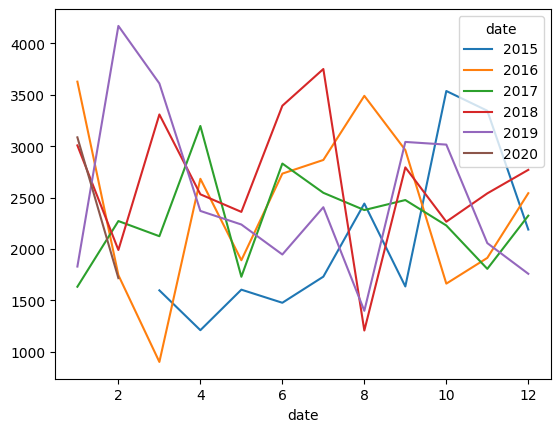

In [50]:
rfm = RFM(engine)
# rfm.df
# trans_count = rfm.df \
# 	.groupby([rfm.df['date'].dt.to_period("M")]) \
# 	.agg(['count'])['customer_id'].reset_index()
trans_count = rfm.df[rfm.df['date'] >= rfm.df['date'].max() - relativedelta(years=5)]
trans_count = trans_count.set_index('date')
# trans_count['date'] = trans_count['date'].astype(str)

trans_count = pd.pivot_table(trans_count, index=trans_count.index.month, columns=trans_count.index.year,
                    values='amount', aggfunc='sum')

trans_count.plot()				

<Axes: xlabel='date', ylabel='count'>

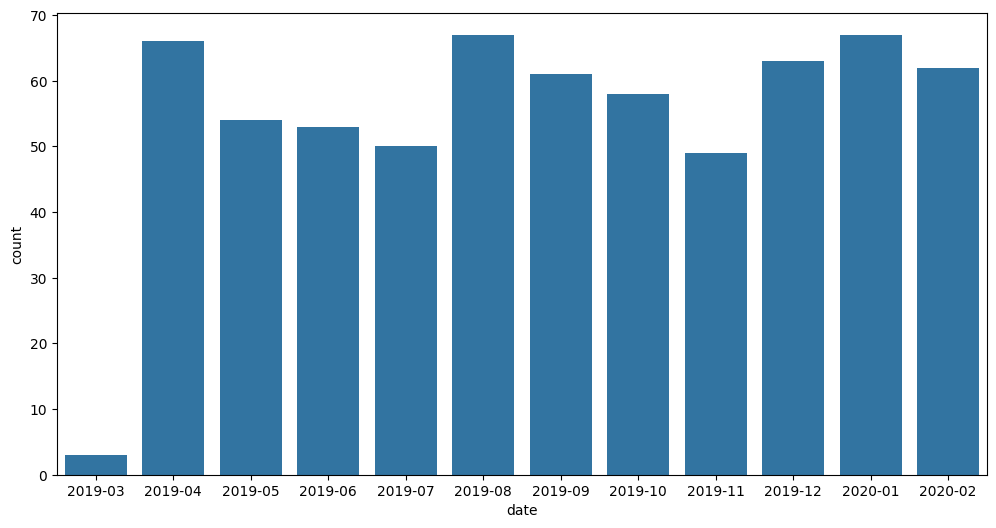

In [4]:
plt.figure(figsize=(12,6))
sns.barplot(x=trans_count['date'], y=trans_count['count'])

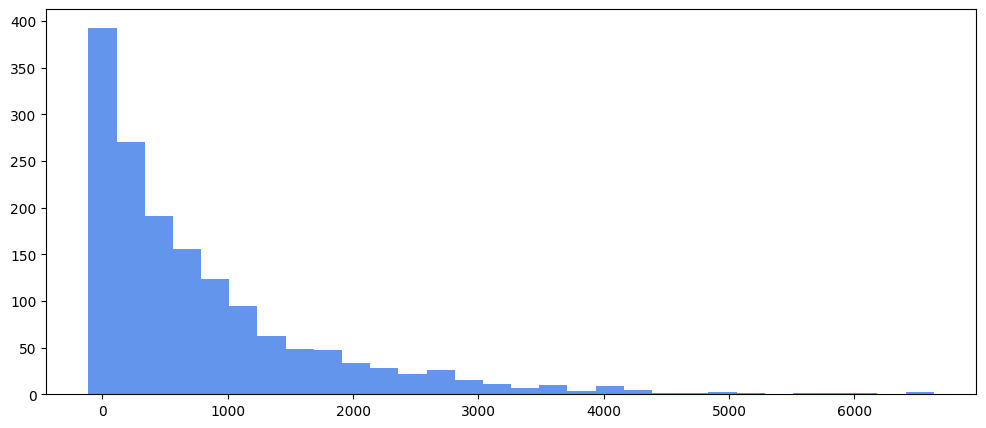

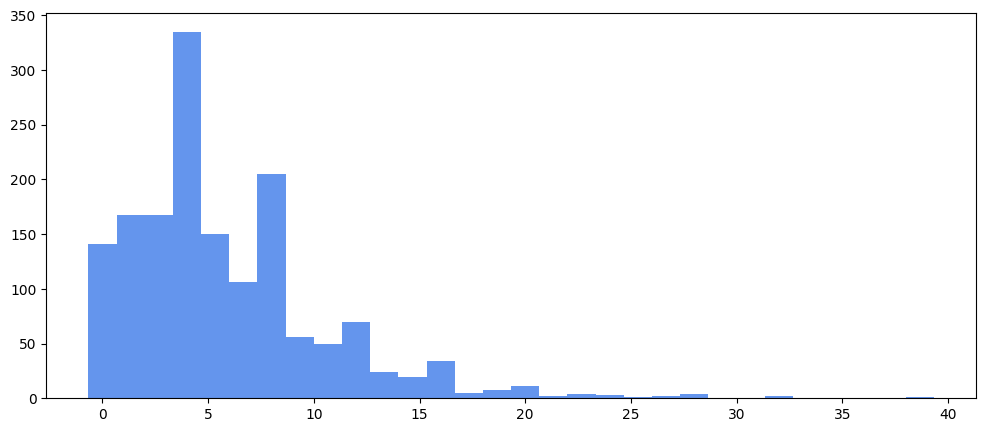

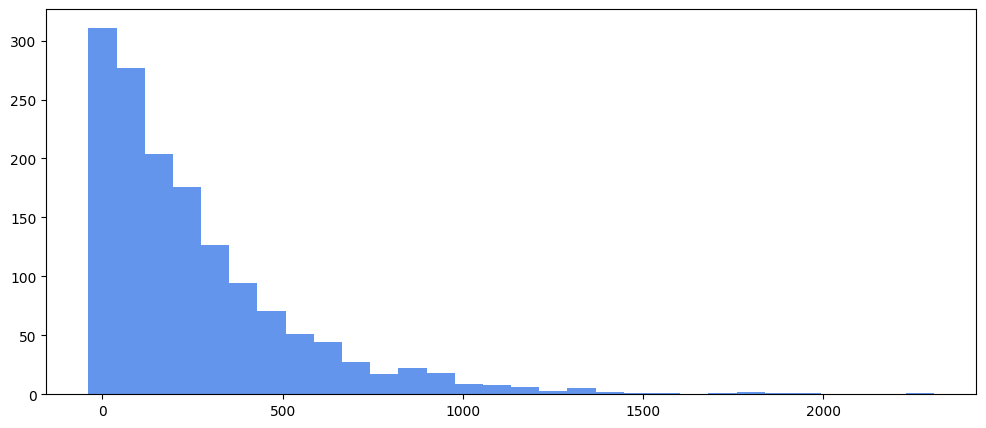

In [51]:
rfms = rfm.get_RFM()
plt.figure(figsize = (12,5))
hist = plt.hist(rfms['recency'], bins=30, range=[0,rfms['recency'].max()], align='left', color='cornflowerblue')
plt.figure(figsize = (12,5))
hist2 = plt.hist(rfms['frequency'], bins=30, range=[0,rfms['frequency'].max()], align='left', color='cornflowerblue')
plt.figure(figsize = (12,5))
hist2 = plt.hist(rfms['monetary'], bins=30, range=[0,rfms['monetary'].max()], align='left', color='cornflowerblue')

In [28]:
data = rfms.groupby(['segment']) \
	.agg('count')['customer_id'] \
	.reset_index() \
	.rename({'customer_id':'count'})
data['countColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
# data = data.to_dict(orient='records')
data

,segment,customer_id,countColor
0,About to Sleep,83,"hsl(229, 70%, 50%)"
1,At Risk,204,"hsl(229, 70%, 50%)"
2,Cannot Lose,57,"hsl(229, 70%, 50%)"
3,Champions,171,"hsl(229, 70%, 50%)"
4,Hibernating,366,"hsl(229, 70%, 50%)"
5,Loyal Customers,308,"hsl(229, 70%, 50%)"
6,Need Attention,79,"hsl(229, 70%, 50%)"
7,New Customers,51,"hsl(229, 70%, 50%)"
8,Potential Loyalists,208,"hsl(229, 70%, 50%)"
9,Promising,40,"hsl(229, 70%, 50%)"


In [10]:
with engine.connect() as db:
	query = sqlalchemy.text(
		'''
		SELECT * FROM engagement;
		''')
	df = pd.DataFrame(db.execute(query).fetchall())
	db.close()
data = df[df['engagement_date'] >= df['engagement_date'].max() - relativedelta(months=11)] \
	.groupby([df['engagement_date'].dt.to_period("M"), 'action_type']) \
	.agg(['count'])['customer_id'] \
	.reset_index() \
	.pivot(index="engagement_date", columns="action_type", values="count") \
	.reset_index() \
	.loc[:, ['engagement_date', 'converted', 'credentials', 'clicked', 'scrolled']] \
	.rename(columns={'engagement_date': 'date'}) \
	.astype({'date': str})
# df
data['convertedColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
data['credentialsColor'] = ["hsl(296, 70%, 50%)" for i in range(len(data))]
data['clickedColor'] = ["hsl(97, 70%, 50%)" for i in range(len(data))]
data['scrolledColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]


result = data.to_dict(orient='records')
print(result)

[{'date': '2024-01', 'converted': 15, 'credentials': 16, 'clicked': 51, 'scrolled': 101, 'convertedColor': 'hsl(229, 70%, 50%)', 'credentialsColor': 'hsl(296, 70%, 50%)', 'clickedColor': 'hsl(97, 70%, 50%)', 'scrolledColor': 'hsl(229, 70%, 50%)'}, {'date': '2024-02', 'converted': 204, 'credentials': 355, 'clicked': 1205, 'scrolled': 2487, 'convertedColor': 'hsl(229, 70%, 50%)', 'credentialsColor': 'hsl(296, 70%, 50%)', 'clickedColor': 'hsl(97, 70%, 50%)', 'scrolledColor': 'hsl(229, 70%, 50%)'}, {'date': '2024-03', 'converted': 181, 'credentials': 284, 'clicked': 995, 'scrolled': 2022, 'convertedColor': 'hsl(229, 70%, 50%)', 'credentialsColor': 'hsl(296, 70%, 50%)', 'clickedColor': 'hsl(97, 70%, 50%)', 'scrolledColor': 'hsl(229, 70%, 50%)'}, {'date': '2024-04', 'converted': 143, 'credentials': 245, 'clicked': 900, 'scrolled': 1627, 'convertedColor': 'hsl(229, 70%, 50%)', 'credentialsColor': 'hsl(296, 70%, 50%)', 'clickedColor': 'hsl(97, 70%, 50%)', 'scrolledColor': 'hsl(229, 70%, 50%)'}

In [11]:
# fig, ax = plt.subplots(figsize=(10, 8))
# df_new.plot(kind='line', stacked=True, linestyle='-', marker='o', ax=ax)
# plt.legend()

In [12]:
with engine.connect() as db:
	query = sqlalchemy.text(
		'''
		SELECT *
		FROM engagement e
		ORDER BY e.engagement_date DESC
		LIMIT 10;
		''')
	df = pd.DataFrame(db.execute(query).fetchall())
	db.close()

df['engagement_date'] = df['engagement_date'].astype(str)
df = df.loc[:, ['customer_id', 'engagement_date', 'action_type', 'feedback_score']]
df = df.rename(columns={'customer_id': 'id', 'engagement_date': 'date', 'action_type': 'action', 'feedback_score': 'score'})
# df.to_dict(orient='records')
df

,id,date,action,score
0,1904,2024-12-28,scrolled,2
1,1071,2024-12-28,credentials,1
2,1660,2024-12-28,scrolled,2
3,0134,2024-12-28,scrolled,1
4,1805,2024-12-28,scrolled,1
5,0130,2024-12-28,scrolled,3
6,1931,2024-12-28,scrolled,2
7,1048,2024-12-28,credentials,2
8,1679,2024-12-28,scrolled,2
9,1435,2024-12-28,clicked,3


In [13]:
with engine.connect() as db:
	query = sqlalchemy.text(
		'''
		SELECT * 
		FROM campaign c;
		''')
	df = pd.DataFrame(db.execute(query).fetchall())
	db.close()
data = df[df['start_date'] >= df['start_date'].max() - relativedelta(months=11)] \
	.groupby([df['start_date'].dt.to_period("M")]) \
	.agg({"budget": ['sum']})['budget'].reset_index().rename(columns={'start_date':'date', 'sum':'spending'})
data['date'] = data['date'].astype(str)
data['spending'] = data['spending'].astype(int)
data['dataColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
data.to_dict(orient='records')

[{'date': '2024-01', 'spending': 746, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-02', 'spending': 1380, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-03', 'spending': 1978, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-04', 'spending': 451, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-05', 'spending': 1054, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-06', 'spending': 4288, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-07', 'spending': 2193, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-08', 'spending': 1181, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-09', 'spending': 1706, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-10', 'spending': 2630, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-11', 'spending': 5534, 'dataColor': 'hsl(229, 70%, 50%)'},
 {'date': '2024-12', 'spending': 7516, 'dataColor': 'hsl(229, 70%, 50%)'}]

In [14]:
from collections import OrderedDict
from src.exception import CustomException
from src.utils import load_object
import joblib

def get_CLO(features):
	model_path = os.path.join("artifacts", "roi_trained_model.pkl")
	encoder_path = os.path.join("artifacts", "roi_onehot_encoder.pkl")

	model = load_object(file_path=model_path)
	encoder = joblib.load(encoder_path) # Load pre-fitted OneHotEncoder
	# Apply the pre-fitted encoder to the new data
	X_encoded = encoder.transform(features[['category']])  # Use transform, not fit_transform

	# Get the expected encoded feature names from the encoder
	encoded_columns = encoder.get_feature_names_out(['category'])

	# Concatenate the encoded category columns with the 'cost' column
	X_transformed = np.concatenate([X_encoded, features[['cost']].values], axis=1)

	pred = model.predict(X_transformed)
	return pd.DataFrame(pred, columns=['clicks', 'leads', 'orders'])

with engine.connect() as db:
	query = sqlalchemy.text(
		'''
		SELECT * FROM campaign;
		''')
	df = pd.DataFrame(db.execute(query).fetchall())
	db.close()

features = df.rename(columns={'channel': 'category', 'budget':'cost'}).loc[:, ['category', 'cost']]
features

CLO = get_CLO(features)

df = pd.concat([df, CLO], axis=1)
df = df[df['start_date'] >= df['start_date'].max() - relativedelta(months=11)] \
	.groupby([df['start_date'].dt.to_period("M")]) \
	.agg({"clicks": ['sum'], "leads": ['sum'], "orders": ['sum']})[['clicks', 'leads', 'orders']].reset_index()

df.columns = df.columns.get_level_values(0)
df['start_date'] = df['start_date'].astype(str)
data = df
data['clicksColor'] = ["hsl(229, 70%, 50%)" for i in range(len(data))]
data['leadsColor'] = ["hsl(296, 70%, 50%)" for i in range(len(data))]
data['ordersColor'] = ["hsl(97, 70%, 50%)" for i in range(len(data))]
data = data.to_dict(orient='records')
data

[{'start_date': '2024-01',
  'clicks': 6581.6900000000005,
  'leads': 163.89,
  'orders': 3295.49,
  'clicksColor': 'hsl(229, 70%, 50%)',
  'leadsColor': 'hsl(296, 70%, 50%)',
  'ordersColor': 'hsl(97, 70%, 50%)'},
 {'start_date': '2024-02',
  'clicks': 13373.74,
  'leads': 323.69,
  'orders': 5250.7300000000005,
  'clicksColor': 'hsl(229, 70%, 50%)',
  'leadsColor': 'hsl(296, 70%, 50%)',
  'ordersColor': 'hsl(97, 70%, 50%)'},
 {'start_date': '2024-03',
  'clicks': 19873.94,
  'leads': 481.57,
  'orders': 8499.8,
  'clicksColor': 'hsl(229, 70%, 50%)',
  'leadsColor': 'hsl(296, 70%, 50%)',
  'ordersColor': 'hsl(97, 70%, 50%)'},
 {'start_date': '2024-04',
  'clicks': 6642.19,
  'leads': 161.57,
  'orders': 1568.96,
  'clicksColor': 'hsl(229, 70%, 50%)',
  'leadsColor': 'hsl(296, 70%, 50%)',
  'ordersColor': 'hsl(97, 70%, 50%)'},
 {'start_date': '2024-05',
  'clicks': 8942.95,
  'leads': 216.81,
  'orders': 4341.04,
  'clicksColor': 'hsl(229, 70%, 50%)',
  'leadsColor': 'hsl(296, 70%, 50%